In [510]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import os
import sys
from pathlib import Path
import sranodec as anom
from sklearn.utils import shuffle

In [654]:
# less than period
amp_window_size=100
# (maybe) as same as period
series_window_size=24
# a number enough larger than period
score_window_size=100
percentile = 95
range_ini = 20
range_end = 95

In [655]:
#df = pd.read_csv('data/NAB/data/realAWSCloudwatch/ec2_cpu_utilization_53ea38.csv', parse_dates=['timestamp'])
df = pd.read_csv('data/NAB/data/realAWSCloudwatch/ec2_cpu_utilization_825cc2.csv', parse_dates=['timestamp'])

#df.head(10)

In [656]:
input_path = Path.cwd()/'data/NAB/data/realAWSCloudwatch/'

In [657]:
list_input_dir = os.listdir(input_path)

In [658]:
list_input_dir

['ec2_cpu_utilization_825cc2.csv', 'ec2_cpu_utilization_53ea38.csv', 'ec2_cpu_utilization_c6585a.csv', 'ec2_cpu_utilization_24ae8d.csv', 'ec2_cpu_utilization_77c1ca.csv', 'rds_cpu_utilization_cc0c53.csv', 'ec2_cpu_utilization_fe7f93.csv', 'ec2_cpu_utilization_ac20cd.csv', 'rds_cpu_utilization_e47b3b.csv', 'ec2_cpu_utilization_5f5533.csv']

In [659]:
input_signal = []
for i in list_input_dir:
    aux = pd.read_csv(input_path/i, parse_dates=['timestamp'])
    ########################### simulate inputation ###########################
    aux_signal = pd.DataFrame()
    aux_signal['datetime'] = aux.timestamp
    aux_signal['cpu'] = aux.value
    aux_signal['mem'] = aux.value * np.ravel(np.random.rand(1, 4032))
    print(i[:-5], "shape: ", aux_signal.shape)
    ############################################################################
    input_signal.append(aux_signal)


ec2_cpu_utilization_825cc shape:  (4032, 3)
ec2_cpu_utilization_53ea3 shape:  (4032, 3)
ec2_cpu_utilization_c6585 shape:  (4032, 3)
ec2_cpu_utilization_24ae8 shape:  (4032, 3)
ec2_cpu_utilization_77c1c shape:  (4032, 3)
rds_cpu_utilization_cc0c5 shape:  (4032, 3)
ec2_cpu_utilization_fe7f9 shape:  (4032, 3)
ec2_cpu_utilization_ac20c shape:  (4032, 3)
rds_cpu_utilization_e47b3 shape:  (4032, 3)
ec2_cpu_utilization_5f553 shape:  (4032, 3)


<AxesSubplot:>

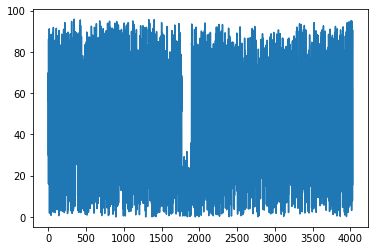

In [660]:
input_signal[0].mem.plot()

In [661]:
score_cpu = []
score_mem = []

index_changes_cpu = []
index_changes_mem = []

anomaly_cadidates_cpu = []
anomaly_cadidates_mem = []

spec = anom.Silency(amp_window_size, series_window_size, score_window_size)

for i in range(len(input_signal)):
    #score_aux = pd.DataFrame()
    #score_aux["cpu"] = spec.generate_anomaly_score(input_signal[i].cpu.values)
    #score_aux["mem"] = spec.generate_anomaly_score(input_signal[i].mem.values)
    
    #index_changes_aux = pd.DataFrame()
    #index_changes_aux["cpu"] = np.where(score_aux["cpu"].values > np.percentile(score_aux["cpu"].values, 90))[0]
    #index_changes_aux["mem"] = np.where(score_aux["mem"].values > np.percentile(score_aux["mem"].values, 90))[0]
    
    #score.append(score_aux)
    #index_changes.append(index_changes_aux)
    
    score_aux_cpu = spec.generate_anomaly_score(input_signal[i].cpu.values)
    score_aux_mem = spec.generate_anomaly_score(input_signal[i].mem.values)
    
    index_changes_aux_cpu = np.where(score_aux_cpu > np.percentile(score_aux_cpu, percentile))[0]
    index_changes_aux_mem = np.where(score_aux_mem > np.percentile(score_aux_mem, percentile))[0]
    
    aux_anomaly_cadidates_cpu = pd.DataFrame(index=index_changes_aux_cpu)
    aux_anomaly_cadidates_mem = pd.DataFrame(index=index_changes_aux_mem)
    
    #aux_anomaly_cadidates_cpu['cpu'] = input_signal[i].loc[index_changes_aux_cpu,'cpu']
    #aux_anomaly_cadidates_mem['mem'] = input_signal[i].loc[index_changes_aux_mem,'mem']

    aux_anomaly_cadidates_cpu['cpu'] = input_signal[i].loc[index_changes_aux_cpu,'cpu']
    aux_anomaly_cadidates_mem['mem'] = input_signal[i].loc[index_changes_aux_mem,'mem']
    
    score_cpu.append(score_aux_cpu)
    index_changes_cpu.append(index_changes_aux_cpu)
    
    score_mem.append(score_aux_mem)
    index_changes_mem.append(index_changes_aux_mem)
    
    anomaly_cadidates_cpu.append(aux_anomaly_cadidates_cpu)
    anomaly_cadidates_mem.append(aux_anomaly_cadidates_mem)
    

/home/jfialho/.local/lib/python3.7/site-packages/sranodec/util.py:31: RuntimeWarning:

invalid value encountered in double_scalars



In [662]:
final = pd.DataFrame(index=index_changes)

In [663]:
final['cpu'] = test_signal[index_changes]

/home/jfialho/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



IndexError: too many indices for array: array is 1-dimensional, but 10 were indexed

In [664]:
final2 = final[~final.loc[:, 'cpu'].between(20, 90)]
#final2 = final[~((final.cpu > 20) & (final.cpu < 90))]

KeyError: 'cpu'

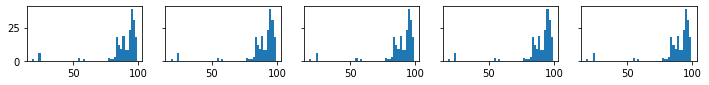

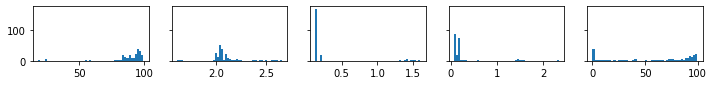

In [665]:
for j in range(2):
    fig, axs = plt.subplots(1, 5, figsize=(12, 1), sharey=True)
    for i in range(5):
        axs[i].hist(anomaly_cadidates_cpu[int(j*i)],bins=50)

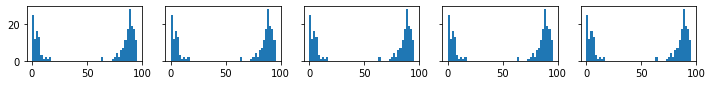

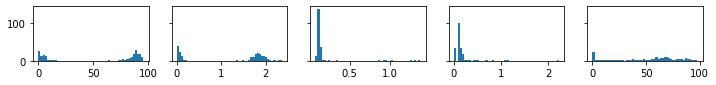

In [666]:
for j in range(2):
    fig, axs = plt.subplots(1, 5, figsize=(12, 1), sharey=True)
    for i in range(5):
        axs[i].hist(anomaly_cadidates_mem[int(j*i)],bins=50)

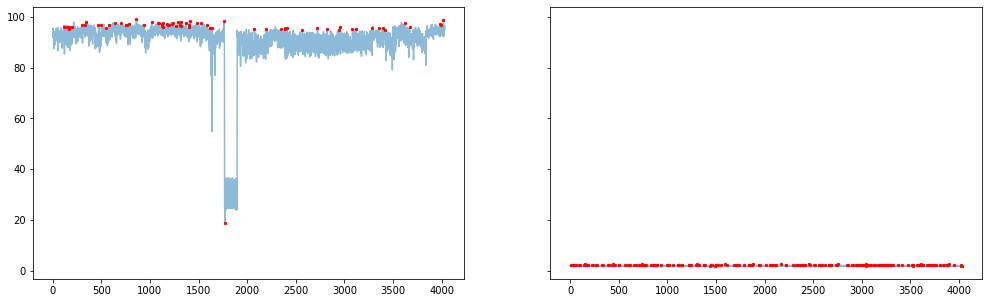

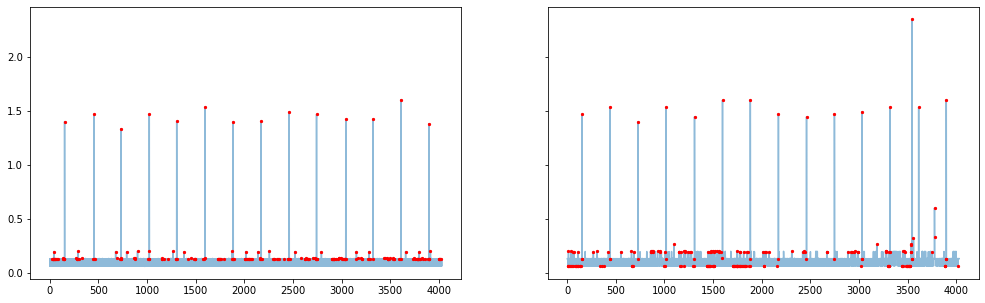

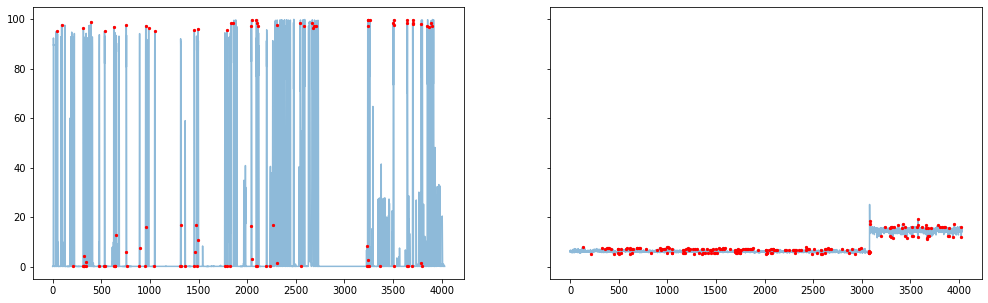

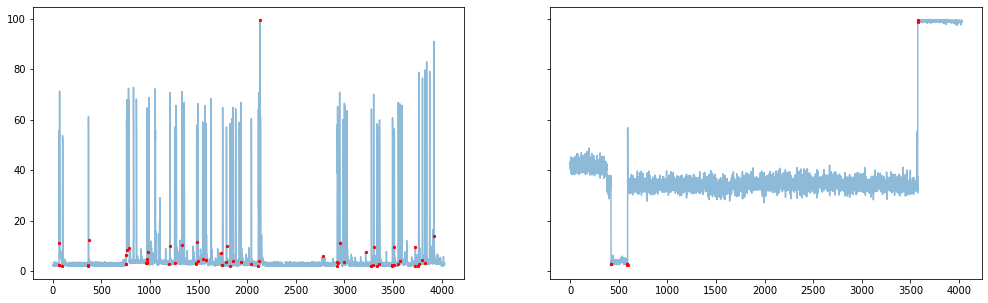

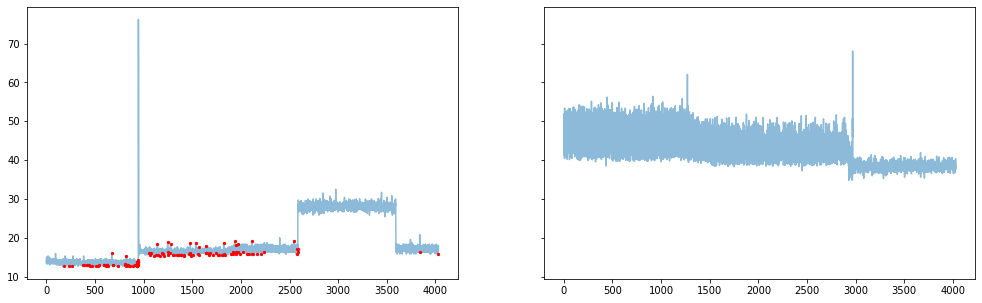

In [667]:
aux=0
for j in range(5):
    fig, axs = plt.subplots(1, 2, figsize=(17, 5), sharey=True)
    for i in range(2):
        axs[i].scatter(anomaly_cadidates_cpu[aux][~anomaly_cadidates_cpu[aux].loc[:, 'cpu'].between(range_ini, range_end)].index.tolist(),
                    anomaly_cadidates_cpu[aux][~anomaly_cadidates_cpu[aux].loc[:, 'cpu'].between(range_ini, range_end)].values,
                    label='anomaly',s=5,c='red',zorder=10
                   )
        axs[i].plot(input_signal[aux].index.tolist(),
                    input_signal[aux].cpu, label='observation',alpha=0.5,zorder=1
                   )

        aux+=1

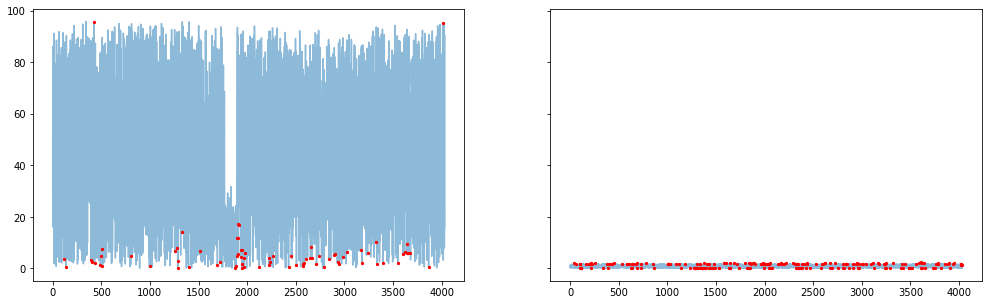

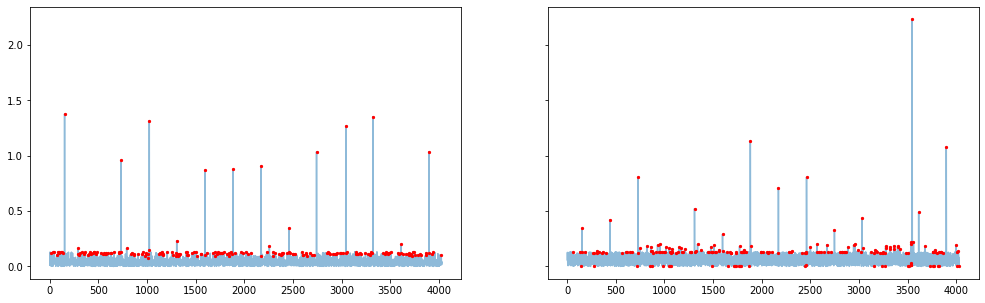

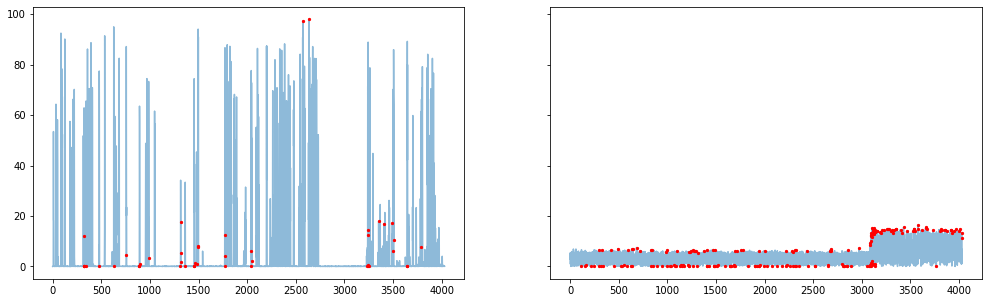

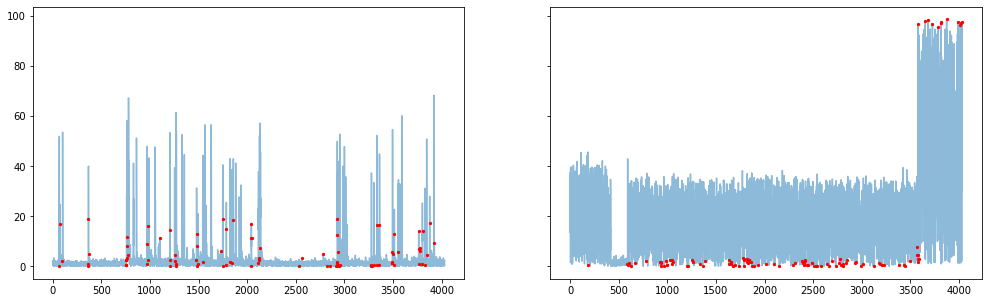

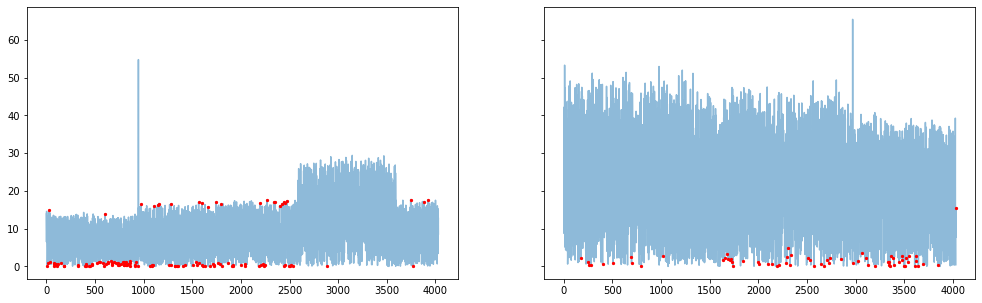

In [668]:
aux=0
for j in range(5):
    fig, axs = plt.subplots(1, 2, figsize=(17, 5), sharey=True)
    for i in range(2):
        axs[i].scatter(anomaly_cadidates_mem[aux][~anomaly_cadidates_mem[aux].loc[:, 'mem'].between(range_ini, range_end)].index.tolist(),
                    anomaly_cadidates_mem[aux][~anomaly_cadidates_mem[aux].loc[:, 'mem'].between(range_ini, range_end)].values,
                    label='anomaly',s=5,c='red',zorder=10
                   )
        axs[i].plot(input_signal[aux].index.tolist(),
                    input_signal[aux].mem, label='observation',alpha=0.5,zorder=1
                   )

        aux+=1

In [503]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=test_signal,
    name='observation',
    mode='lines'
))

fig.add_trace(go.Scatter(
    x = final2.index.tolist(),
    y=np.array(final2.cpu),
    name='anomaly',
    mode='markers'
))


fig.show()

In [326]:
final2

,cpu
2,1.960
8,2.026
20,1.998
32,1.990
38,2.000
...,...
3974,1.996
3980,1.994
4016,1.992
4022,1.966


In [635]:
aux=0
for j in range(5):
    for i in range(2):
        print(aux)
        aux+=1


0
1
2
3
4
5
6
7
8
9
